In [1]:
import numpy as np
import scipy.stats
import scipy.interpolate
import pylab as plt
from scipy.optimize import curve_fit
plt.rcParams['figure.figsize'] = [8, 8]
from astroML.datasets import fetch_dr7_quasar
from tqdm import tqdm

# Fetch the quasar data
data = fetch_dr7_quasar()

# select the first 10000 points
data = data[:10000]

z = data['redshift']

# Rejection

100%|██████████| 100000/100000 [00:08<00:00, 11223.74it/s]


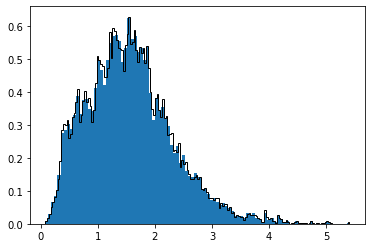

In [2]:
N=100000
counts, bins, bars = plt.hist(z, bins = int(np.sqrt(len(z))), density = True)
x = np.random.uniform(0,max(bins),N)
y = np.random.uniform(0,max(counts),N)
goodpoints = []

for i in tqdm(range(N)):
    for j in range(len(counts)):
        if bins[j] < x[i] < bins[j+1]:
            if y[i] <= counts[j]:
                goodpoints.append(x[i])

plt.hist(goodpoints,bins = int(np.sqrt(len(goodpoints))), density = True, histtype='step',color='black');

# Inverse transform sampling

[3.99640324e-04 1.99820162e-03 5.59496453e-03 1.00909182e-02
 1.79838146e-02 3.26705965e-02 4.77570187e-02 6.39424518e-02
 7.93286043e-02 9.69127785e-02 1.17594165e-01 1.35278250e-01
 1.55260266e-01 1.75342192e-01 1.93925467e-01 2.12109102e-01
 2.33989410e-01 2.60465581e-01 2.85343191e-01 3.07723049e-01
 3.34199221e-01 3.63472874e-01 3.93745629e-01 4.24218204e-01
 4.53791588e-01 4.79868119e-01 5.08242582e-01 5.41412729e-01
 5.71185933e-01 6.01558597e-01 6.29233690e-01 6.57608153e-01
 6.84084324e-01 7.12658607e-01 7.33739634e-01 7.50524528e-01
 7.70806274e-01 7.88989909e-01 8.07872914e-01 8.24857628e-01
 8.40643421e-01 8.53431911e-01 8.64821661e-01 8.77310421e-01
 8.87101609e-01 8.98191628e-01 9.06783894e-01 9.14576881e-01
 9.22070137e-01 9.30262764e-01 9.37756020e-01 9.43350984e-01
 9.48945949e-01 9.53741633e-01 9.57538216e-01 9.61634529e-01
 9.65231292e-01 9.68328504e-01 9.71725447e-01 9.74622839e-01
 9.77120591e-01 9.79118793e-01 9.80317714e-01 9.81616545e-01
 9.82915376e-01 9.838145

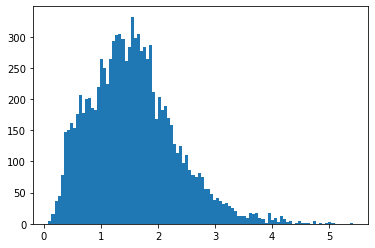

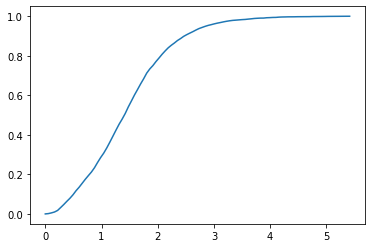

In [7]:
counts, bins, bars = plt.hist(z, bins = int(np.sqrt(len(z))))
for i in range(0, len(counts)):
    if counts[i]==0:
        counts[i]+=1

cdf = np.zeros(len(counts))
cdf_norm = np.zeros(len(counts))
x_data = np.linspace(0, max(z), int(np.sqrt(len(z))))

cdf[0] = counts[0]
cdf_norm[0] = cdf[0]/np.sum(counts)

for i in range(1, len(counts)):
    cdf[i] = cdf[i-1] + counts[i]
    cdf_norm[i] = cdf[i]/np.sum(counts)

print (cdf_norm)
plt.show()
plt.plot(x_data, cdf_norm)

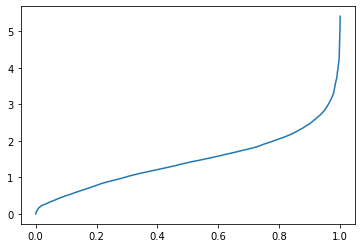

In [8]:
plt.plot(cdf_norm, x_data)
plt.show()

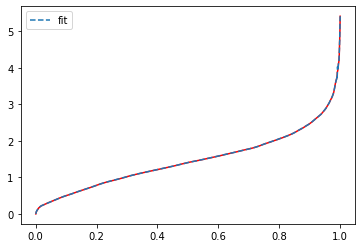

In [9]:
from scipy.interpolate import CubicSpline

fit = CubicSpline(cdf_norm, x_data)
plt.plot(cdf_norm, x_data, color = 'red')
xs = np.arange(min(cdf_norm), 1., 0.000001)
plt.plot(xs, fit(xs), label = 'fit', linestyle = '--')
plt.legend()

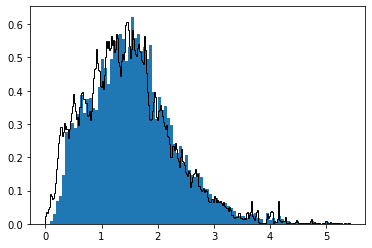

In [10]:
counts, bins, bars = plt.hist(z, bins = int(np.sqrt(len(z))), density=True)

eps = np.random.uniform(min(cdf_norm),max(cdf_norm),N)

x = fit(eps)

plt.hist(x, bins = int(np.sqrt(N)), density=True, histtype='step',color='black')
plt.show()

In [156]:
import astropy
astropy.cosmology.Planck18

FlatLambdaCDM(name="Planck18", H0=67.7 km / (Mpc s), Om0=0.31, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.049)